In [12]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]


train_path = '/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Training-Dataset/'
valid_path = '/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/'

# add preprocessing layer to the front of VGG
mbnt = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
pip install xlsxwriter

In [17]:
import xlsxwriter
workbook = xlsxwriter.Workbook('/content/drive/MyDrive/CatractImagesMobileNet/dataset2/files/MobileNetV2CatractImagesAnalysis.xlsx')
worksheet1 = workbook.add_worksheet()
row=0
col=0
imageCount=0
worksheet1.write(row, 0, str("Analysis of Image"))
worksheet1.write(row, 1, str("Actual Object"))
worksheet1.write(row, 2, str("Percentage for Detected Object"))
worksheet1.write(row, 3, str("Detected Object"))
import os

row=1
for path, currentDirectory, files in os.walk("/content/drive/MyDrive/CatractImagesMobileNet\dataset2\CatractDataset\Test-Dataset"):
    for file in files:
        print(os.path.join(path, file))
        imageCount=imageCount + 1
        worksheet1.write(row, 0, str("Image-" + str(imageCount)))
        row=row+1


In [18]:
imageCount

0

In [19]:
# don't train existing weights
for layer in mbnt.layers:
    layer.trainable = False

In [20]:
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Training-Dataset/*')
print(len(folders))

2


In [21]:
# our layers - you can add more if you want
x = Flatten()(mbnt.output)
x = Dense(200, activation='relu')(x)
x = Dense(100, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)
#prediction = Dense(1, activation='sigmoid')(x)


In [36]:
# create a model object
model = Model(inputs=mbnt.input, outputs=prediction)

In [23]:
# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [37]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Mounted at /content/drive


In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Training-Dataset/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 144 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


In [26]:
import os
cats=[]
cat=[]
for path, currentDirectory, files in os.walk("/content/drive/MyDrive/CatractImagesMobileNet\dataset2\CatractDataset\Training-Dataset"):
    for file in files:
        #print(os.path.join(path, file))
        #print(file)
        cats=path.split("\\")
        cats=cats[len(cats)-1]
        if cats not in cat:
            cat.append(cats)
            print(cats)
cat.sort()
print(cat)

#images,cls = next(test_set)



[]


In [ ]:
#images,cls = next(test_set)
#plt.imshow(images[3])
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [27]:
len(test_set)

3

In [39]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
5/5 [==============================] - 8s 953ms/step - loss: 4.0236 - accuracy: 0.7292 - val_loss: 0.7221 - val_accuracy: 0.9722
Epoch 2/5
5/5 [==============================] - 4s 848ms/step - loss: 1.0602 - accuracy: 0.9167 - val_loss: 0.9981 - val_accuracy: 0.8889
Epoch 3/5
5/5 [==============================] - 3s 528ms/step - loss: 1.1144 - accuracy: 0.9444 - val_loss: 0.7578 - val_accuracy: 0.9583
Epoch 4/5
5/5 [==============================] - 4s 810ms/step - loss: 1.4534 - accuracy: 0.9375 - val_loss: 0.4071 - val_accuracy: 0.9722
Epoch 5/5
5/5 [==============================] - 3s 542ms/step - loss: 0.2618 - accuracy: 0.9722 - val_loss: 0.0896 - val_accuracy: 0.9861


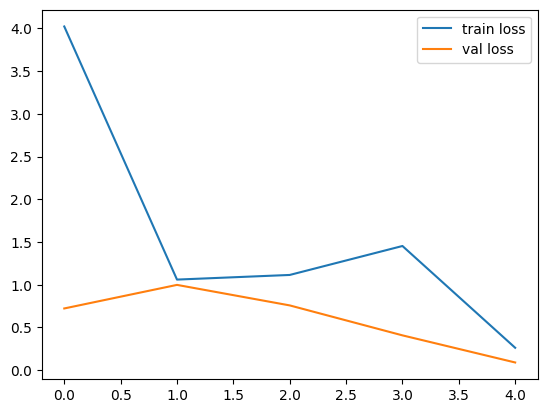

In [40]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

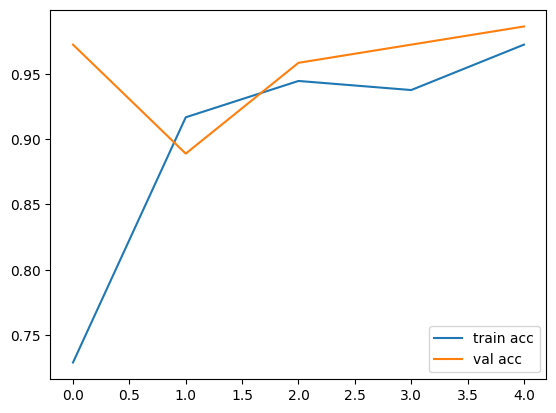

In [41]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [ ]:
model.save("/content/drive/MyDrive/CatractImagesMobileNet/dataset2/MobileV2CataractModel.h4")

In [42]:
import os
import shutil
import numpy as np
origin = '/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/cataract/'
target1 = '/content/drive/MyDrive/CatractImagesMobileNet/TestCheckCataract/cataract/'
files = os.listdir(origin)
actual=[]
predicted=[]
values=[]
imageName=[]
ac=[]
pr=[]
for file_name in files:
    #print(origin+file_name)
    #print(target1+file_name)
    shutil.copy(origin+file_name, target1+file_name)
    imageName.append(str(origin+file_name))
    print(str(origin+file_name))
    #print("Original" + str(origin+file_name))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CatractImagesMobileNet/TestCheckCataract/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')
    images,cls = next(test_set)
    #print("Actual Child")
    pred = model.predict(test_set)

    for my_array in pred:
      values.append(my_array)
      #print(np.argmax(my_array))
      max_index = np.argmax(my_array)
      print("Actual: 0 predicted: " + str(max_index))
      predicted.append(max_index)
      actual.append(0)
    path = r"/content/drive/MyDrive/CatractImagesMobileNet/TestCheckCataract/cataract/"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            #print('Deleting file:', fi)
            os.remove(fi)

/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/cataract/_62_4939088.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 1s 821ms/step
Actual: 0 predicted: 0
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/cataract/_52_3704655.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 40ms/step
Actual: 0 predicted: 0
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/cataract/_48_7953833.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 41ms/step
Actual: 0 predicted: 0
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/cataract/_51_7561724.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 40ms/step
Actual: 0 predicted: 0
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/cataract/_52_7569766.jpg
Fou

In [43]:
import os
import shutil
import numpy as np
origin = '/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/normal/'
target1 = '/content/drive/MyDrive/CatractImagesMobileNet/TestCheckCataract/normal/'
files = os.listdir(origin)

for file_name in files:
    #print(origin+file_name)
    #print(target1+file_name)
    shutil.copy(origin+file_name, target1+file_name)
    imageName.append(str(origin+file_name))
    print(str(origin+file_name))
    #print("Original" + str(origin+file_name))
    test_datagen = ImageDataGenerator(rescale = 1./255)
    test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CatractImagesMobileNet/TestCheckCataract/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'binary')
    images,cls = next(test_set)
    #print("Actual Child")
    pred = model.predict(test_set)

    for my_array in pred:
      values.append(my_array)
      #print(np.argmax(my_array))
      max_index = np.argmax(my_array)
      print("Actual: 1 predicted: " + str(max_index))
      predicted.append(max_index)
      actual.append(1)
    path = r"/content/drive/MyDrive/CatractImagesMobileNet/TestCheckCataract/normal/"
    for fileN in os.listdir(path):
        # construct full file path
        fi = path + fileN
        if os.path.isfile(fi):
            #print('Deleting file:', fi)
            os.remove(fi)

/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/normal/2394_right.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 40ms/step
Actual: 1 predicted: 1
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/normal/2400_right.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 41ms/step
Actual: 1 predicted: 1
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/normal/2415_right.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 41ms/step
Actual: 1 predicted: 1
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/normal/2397_left.jpg
Found 1 images belonging to 2 classes.
1/1 [==============================] - 0s 48ms/step
Actual: 1 predicted: 1
/content/drive/MyDrive/CatractImagesMobileNet/dataset2/CatractDataset/Test-Dataset/normal/2386_right.jpg
Found 1 images belon

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(actual, predicted)

In [45]:
cm

array([[35,  1],
       [ 0, 36]])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      1.00      0.99        36

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



Text(0.5, 1.0, 'Confusion Matrix on Cataract and Normal Eye using MobileNetV2 on Dataset-2')

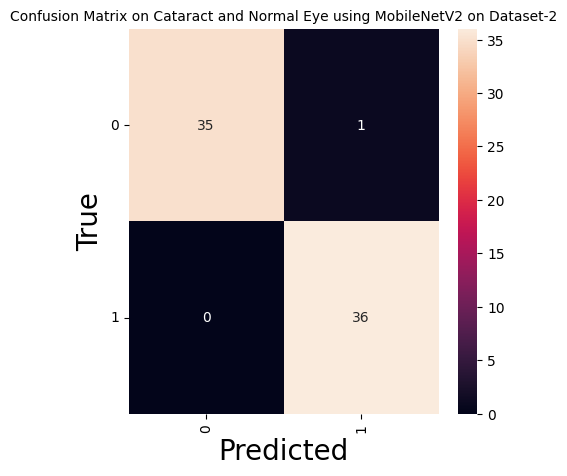

In [47]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
#predictions = model.predict(x_test, steps=len(x_test), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)

y_pred = np.argmax(predicted, axis=-1)

y_true=np.argmax(actual, axis=-1)

cm = confusion_matrix(actual, predicted)

## Get Class Labels
#labels = le.classes_
class_names = [0,1]

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(5, 5))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix on Cataract and Normal Eye using MobileNetV2 on Dataset-2', fontsize=10)

In [ ]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CatractDataset\\Test-Dataset",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)


Found 40 images belonging to 2 classes.
[[6.8655385e-21 1.0000000e+00]
 [1.0000000e+00 3.6590593e-09]
 [4.5436084e-15 1.0000000e+00]
 [0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 7.5790901e-10]
 [2.5152353e-24 1.0000000e+00]
 [9.9942613e-01 5.7391904e-04]
 [1.0000000e+00 8.1631216e-11]
 [7.4145715e-03 9.9258536e-01]
 [1.0000000e+00 6.1400980e-18]
 [1.0000000e+00 5.0638112e-16]
 [1.0505011e-14 1.0000000e+00]
 [9.9626166e-01 3.7383370e-03]
 [1.9223408e-11 1.0000000e+00]
 [1.0000000e+00 3.5811604e-10]
 [2.1472514e-34 1.0000000e+00]
 [1.2296066e-25 1.0000000e+00]
 [1.0000000e+00 1.4199188e-18]
 [1.3169962e-28 1.0000000e+00]
 [1.4411874e-01 8.5588127e-01]
 [1.7059402e-12 1.0000000e+00]
 [2.2657498e-04 9.9977344e-01]
 [1.0000000e+00 3.0655267e-24]
 [1.0000000e+00 4.1430520e-22]
 [2.0073756e-20 1.0000000e+00]
 [3.3160269e-25 1.0000000e+00]
 [1.0000000e+00 1.4619722e-17]
 [9.9988270e-01 1.1726055e-04]
 [4.2863788e-19 1.0000000e+00]
 [1.4836632e-11 1.0000000e+00]
 [1.3579433e-26 1.0000000e+00]

In [ ]:
test_set = test_datagen.flow_from_directory("D:\CatractImagesMobileNet\cataract\CatractDataset\\TestC",
                                            target_size = (224, 224),
                                            batch_size = 40,
                                            class_mode = 'categorical')

pred = model.predict(test_set)
print(pred)


Found 1 images belonging to 2 classes.
[[1.424292e-32 1.000000e+00]]


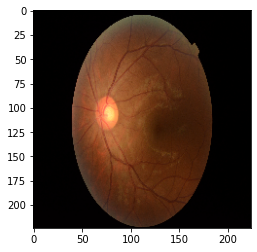

In [ ]:
images,cls = next(test_set)
plt.imshow(images[0])

0 Actual: cataract
File: cataract\cataract_061.png
0predicted: cataract
[1. 0.]
[1.0, 1.8294927408408178e-14]
0 Actual: cataract
File: cataract\cataract_062.png
1predicted: normal
[1. 0.]
[1.1934121196892726e-27, 1.0]
0 Actual: cataract
File: cataract\cataract_063.png
0predicted: cataract
[1. 0.]
[1.0, 1.580228368636709e-22]
0 Actual: cataract
File: cataract\cataract_064.png
0predicted: cataract
[1. 0.]
[1.0, 4.247984814609392e-24]
0 Actual: cataract
File: cataract\cataract_065.png
0predicted: cataract
[1. 0.]
[0.9014812111854553, 0.09851879626512527]
0 Actual: cataract
File: cataract\cataract_066.png
0predicted: cataract
[1. 0.]
[0.9999998807907104, 1.5927223273592972e-07]
1 Actual: normal
File: cataract\cataract_067.png
0predicted: cataract
[0. 1.]
[1.0, 1.4415678123869818e-13]
1 Actual: normal
File: cataract\cataract_068.png
0predicted: cataract
[0. 1.]
[0.9979922771453857, 0.002007740782573819]
0 Actual: cataract
File: cataract\cataract_069.png
0predicted: cataract
[1. 0.]
[0.99305

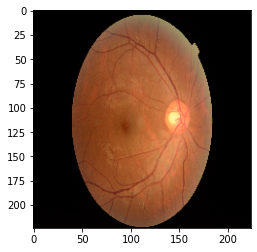

In [ ]:
images,cls = next(test_set)
filename=test_set.filenames

#plt.imshow(images[0])
#print(cls[0])
#print(filename[0])
i=0
actual=[]
predicted=[]
for cl in cls:
    c=cl.tolist()
    max_value = max(c)
    max_index = c.index(max_value)
    print(str(max_index) + " Actual: " + cat[max_index])
    print("File: "  + filename[i])
    plt.imshow(images[i])
    actual.append(cat[max_index])

    pd=pred[i].tolist()
    m_value = max(pd)
    #print(max_value)
    m_index = pd.index(m_value)
    #print(max_index)
    print(str(m_index) + "predicted: " + cat[m_index])
    predicted.append(cat[m_index])
    print(cl)
    print(pd)
    #print("file" + filename[i])
    #plt.savefig('D:\\CatractImagesMobileNet\cataract\Predicted\Actual-' + str(cat[max_index]) + ' Predicted-' + str(cat[m_index])+ '-' +'Detected Image Name-' + str(filename[i]).split('\\')[1] + str(i) +'.png')

    i=i+1

#print(pd)
#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()


Found 1 images belonging to 2 classes.
[[1.000000e+00 8.760157e-26]]


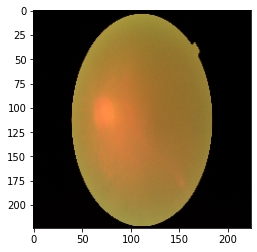

In [ ]:
len(actual)

40

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

    cataract       0.12      0.10      0.11        20
     glacuma       0.44      0.60      0.51        40
      normal       0.50      0.20      0.29        20

    accuracy                           0.38        80
   macro avg       0.35      0.30      0.30        80
weighted avg       0.37      0.38      0.35        80



In [ ]:
#for file in test_set.filenames:
 #   print(file)

In [ ]:


#plt.savefig('D:\\imageeee.png')
#print("ok")
#plt.show()

In [ ]:
#for t in test_set:
 #   print(t)

In [ ]:
actual=[]
img=1
row=1
for i in range(int(imageCount/8)):
    images,cls = next(test_set)
    print(len(cls))
    #print("In in first batch at 3")
    j=0
    for c in cls:
        cl=c.tolist()
        m_value = max(cl)
        m_index = cl.index(m_value)
        print("Index" + str(m_index))
        print("Actual: " + cat[m_index])
        print("class", cl)
        actual.append(cat[m_index])
        worksheet1.write(row, 1, str(cat[m_index]))

        #plt.imshow(images[j])
        #plt.savefig("D:\\ImagesForCocoAssesment\\MobileNet\\TagsForInputImagesGeneratedByProgram\\" + str(img) + "-" + str(cat[m_index]) + ".png")
        img=img+1
        j=j+1
        row=row+1
    i=i+1



32
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index1
Actual: normal
class [0.0, 1.0]
Index0
Actual: cataract
class [1.0, 0.0]
Index0
Actual: cataract
class [1.

In [ ]:
workbook.close()


C:\Users\saqib\anaconda3\envs\TF\lib\site-packages\xlsxwriter\workbook.py:338: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


In [ ]:
actual

['cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'normal',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'cataract',
 'cataract',
 'normal',
 'cataract',
 'c

              precision    recall  f1-score   support

    cataract       1.00      1.00      1.00         2
      normal       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



32